In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [ ]:
data_path = '/content/drive/My Drive/Devanagari/Kp_Devanagari_final.csv'
df = pd.read_csv(data_path)

In [ ]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [ ]:
before_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_df = df_filtered[df_filtered['time_period'] == 'after_election']

In [ ]:
df1= before_df['text']
df2= after_df['text']

In [3]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import re
import spacy


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df1:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines1 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines1.append(w)


print(lines1)

['рдХрдореЗрдбреА', 'рд╕рд╣реА', 'рд╣реЛ', 'рдХреЗрдкреА', 'рдмрд╛', 'рдХреЛ', 'рд╣рд▓рдХрд╛', 'рд░рд╛рдореНрд░реЛ', 'рдЫ', 'рд╕рд╛рдереАрд╣рд░реВ', 'рдЕрд░реБ', 'рдиреЗрддрд╛рдХреЛ', 'рднрдиреНрджрд╛', 'рджреБрд░реНрдЧрд╛', 'рдкрд░реНрд╢рд╛рдИ', 'рдЪрд╛рд╣рд┐рдпреЛ', 'рд╕рд░ред', 'рдиреЗрдкрд╛рд▓', 'рдореИ', 'рдкреИрд╕рд╛', 'рддреНрд░рд╛', 'рдореБрдирд┐рдХрд╛', 'рдиреЗрддрд╛', 'рд╣рд░реБ', 'рд▓реЗ', 'рдХрд╛рдо', 'рдирдЧрд░реЗрдХреИ', 'рд╣реЛ', 'рд╡рд╕реН\u200dрддрдЪрд╛рд░', 'рдорд╛рддреНрд░', 'рдЧреЗрд░реЗ', 'рдХреЗрдкреА', 'рдард┐рдХреН\u200dрд╕рд╛', 'рдЕрд░реБ', 'рд╡рдиреНрдж', 'рдореЗрд░реЛ', 'рдмрд┐рдЪрд╛рд░', 'рдорд╛', 'реирежреиреи', 'рд▓рд╛рдбреЛ', 'рдЬрд╕реНрддреЛ', 'рдХреБрд░рд╛', 'рдЧрд░реНрдЫ', 'рдкрд╛рдЧрд▓ред', 'рд╣рд╛рд╣рд╛рд╣рд╛', 'рд░рд╡рд┐', 'рд▓рдореЗрдЫрд╛рдиреЗ', 'рд▓рд╛рдЗ', 'рдЬрд┐рддреНрдиреЗ', 'рднрдиреЗ', 'рдиреЗ', '<br>рдиреЗрдкрд╛рд▓реА', 'рд╣реЛ', 'рддрдореЗ', 'рд╣рд╛рд░реБ', 'рдореБрд░реНрдЦрд╛', 'рд╣реЛ', '!', '<br>рдлреЗрд░реА', 'рдмреБрдбрд╛', 'рд▓реЗ',

In [ ]:
import re

lines1 = [re.sub(r'[^рдЕ-рд╣рд╝\w]+', '', x) for x in lines1]

lines1_final = []

for word in lines1:
    if word != '':
        lines1_final.append(word)

print(lines1_final)


['рдХрдордб', 'рд╕рд╣', 'рд╣', 'рдХрдк', 'рдм', 'рдХ', 'рд╣рд▓рдХ', 'рд░рдорд░', 'рдЫ', 'рд╕рдерд╣рд░', 'рдЕрд░', 'рдирддрдХ', 'рднрдирдж', 'рджрд░рдЧ', 'рдкрд░рд╢рдИ', 'рдЪрд╣рдп', 'рд╕рд░', 'рдирдкрд▓', 'рдо', 'рдкрд╕', 'рддрд░', 'рдордирдХ', 'рдирдд', 'рд╣рд░', 'рд▓', 'рдХрдо', 'рдирдЧрд░рдХ', 'рд╣', 'рд╡рд╕рддрдЪрд░', 'рдорддрд░', 'рдЧрд░', 'рдХрдк', 'рдардХрд╕', 'рдЕрд░', 'рд╡рдирдж', 'рдорд░', 'рдмрдЪрд░', 'рдо', 'реирежреиреи', 'рд▓рдб', 'рдЬрд╕рдд', 'рдХрд░', 'рдЧрд░рдЫ', 'рдкрдЧрд▓', 'рд╣рд╣рд╣', 'рд░рд╡', 'рд▓рдордЫрди', 'рд▓рдЗ', 'рдЬрддрди', 'рднрди', 'рди', 'brрдирдкрд▓', 'рд╣', 'рддрдо', 'рд╣рд░', 'рдорд░рдЦ', 'рд╣', 'brрдлрд░', 'рдмрдб', 'рд▓', 'рджрд╢', 'рджрдмрдХрд╕', 'рдмрдХрд╡рд╕', 'рдзрд░рдИ', 'рд░рдорд░', 'рд╢рд░', 'рдмрджрд░', 'рджрдЙрд╡', 'рдХ', 'рднрд░', 'рдХрд▓', 'рдЖрдЙрди', 'рддрд╕рдо', 'рд╢рдорд▓', 'рд╣рдЬрд░', 'рдкрди', 'xa', 'рд╣', 'рдУрд▓', 'рдм', 'рдпрд▓', 'рдХ', 'рд▓рд╡рд░рдХ', 'рдЫ', 'рдХ', 'рдпрд▓', 'рдирдкрд▓', 'рд╡рдг', 'рджрд╢', 'рдмрдирдЗрд╕рдХрдп

In [ ]:
nepali_stop_words = {
    'рд╣реЛ', 'рдХреЛ', 'рд░', 'рдпреЛ', 'рдЫ', 'рдкрдирд┐', 'рдХреЗ', 'рдХреБрд░рд╛', 'рдд', 'рдПрдХ', 'рдо', 'рдЙрд╣рд╛рдБ', 'рддрд┐рдореА', 'рдЧрд░реНрдиреЗ'
    'рд╣рд╛рдореА', 'рддрд┐рдореАрд╣рд░реВ', 'рд╣рд╛рдореАрд╣рд░реВ', 'рдЙрд╕рдХреЛ', 'рдЙрдиреА', 'рддрд┐рдиреА', 'рдорд╛рдерд┐', 'рдиреАрдЪреЗ', 'рдЖрджрд┐', 'рдорд╛рддреНрд░', 'рддрд░','рд▓рд╛рдИ', 'рджреЗрд╢', 'рд▓реЗ', 'рдорд╛', 'рдЕрдм', 'рдиреИ', 'рдЬрдирддрд╛', 'рдХрд╛рдо', 'рдиреЗрдкрд╛рд▓', 'рдЕрдирд┐', 'рд╡рд░реНрд╖', 'рд╣реБрди', 'рд╣реЛ', 'рднрдПрдХреЛ', 'рдерд┐рдпреЛ', 'рдХреЗ', 'рддрдкрд╛рдИрдВ', 'рд╕рд╛рде', 'рдХреБрд░рд╛', 'рдпреЛ', 'рдЙрд╣рд╛рдБ', 'рдЫ', 'рд░', 'рд╣реЛ', 'рдкрдирд┐', 'рдЧрд░реНрджреИрди', 'рд╣рд░реБ', 'ред' }

# Remove stop words
stem1 = [word for word in lines1_final if word not in nepali_stop_words]

print(stem1)

['рдХрдордб', 'рд╕рд╣', 'рд╣', 'рдХрдк', 'рдм', 'рдХ', 'рд╣рд▓рдХ', 'рд░рдорд░', 'рд╕рдерд╣рд░', 'рдЕрд░', 'рдирддрдХ', 'рднрдирдж', 'рджрд░рдЧ', 'рдкрд░рд╢рдИ', 'рдЪрд╣рдп', 'рд╕рд░', 'рдирдкрд▓', 'рдкрд╕', 'рдордирдХ', 'рдирдд', 'рд╣рд░', 'рд▓', 'рдХрдо', 'рдирдЧрд░рдХ', 'рд╣', 'рд╡рд╕рддрдЪрд░', 'рдорддрд░', 'рдЧрд░', 'рдХрдк', 'рдардХрд╕', 'рдЕрд░', 'рд╡рдирдж', 'рдорд░', 'рдмрдЪрд░', 'реирежреиреи', 'рд▓рдб', 'рдЬрд╕рдд', 'рдХрд░', 'рдЧрд░рдЫ', 'рдкрдЧрд▓', 'рд╣рд╣рд╣', 'рд░рд╡', 'рд▓рдордЫрди', 'рд▓рдЗ', 'рдЬрддрди', 'рднрди', 'рди', 'brрдирдкрд▓', 'рд╣', 'рддрдо', 'рд╣рд░', 'рдорд░рдЦ', 'рд╣', 'brрдлрд░', 'рдмрдб', 'рд▓', 'рджрд╢', 'рджрдмрдХрд╕', 'рдмрдХрд╡рд╕', 'рдзрд░рдИ', 'рд░рдорд░', 'рд╢рд░', 'рдмрджрд░', 'рджрдЙрд╡', 'рдХ', 'рднрд░', 'рдХрд▓', 'рдЖрдЙрди', 'рддрд╕рдо', 'рд╢рдорд▓', 'рд╣рдЬрд░', 'рдкрди', 'xa', 'рд╣', 'рдУрд▓', 'рдм', 'рдпрд▓', 'рдХ', 'рд▓рд╡рд░рдХ', 'рдХ', 'рдпрд▓', 'рдирдкрд▓', 'рд╡рдг', 'рджрд╢', 'рдмрдирдЗрд╕рдХрдп', 'рдЖрдм', 'рдХ', 'рдЧрд░рди', 'рдмр

In [ ]:
!apt-get install -y fonts-noto

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 317 MB of archives.
After this operation, 789 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:2022

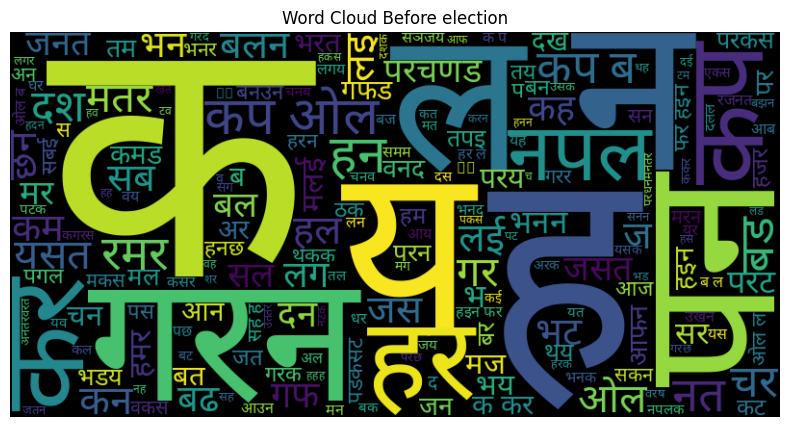

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem1

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before election')
plt.show()

In [ ]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df2:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines2 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines2.append(w)


print(lines2)

['рдпреЛ', 'рдд', 'рд╕рдмрд╛рдИ', 'рдиреЗрдкрд╛рд▓реА', 'рдпреБрд╡рд╛', 'рд╣рд░реБ', 'рд▓реЗ', 'рдвреЗрд░реИ', 'рджреЗрдЦреА', 'рдЪрд╛рд╣реЗрдХреЛ', 'рдХреБрд░рд╛', 'рд╣реЛ', 'рдХрд╛рд▓реЗ', 'рдХрд╛рд▓реЗ', 'рдорд┐рд▓реЗрдХреНрд╕', 'рдЕрдм', 'рднрд▓реЗ', 'рдХреЛ', 'рдХрд▓', 'рдХрдореНрдмреЛрдбрд┐рдпрд╛', 'рдХрд┐рди...рд▓рдЧрд╛рдиреА..рд╕рд░рдмрдЬрд╛рдирд┐рдХ', 'рдирдЧрд░рд┐рджрд┐рдиреБ', 'рд╣реЛрд▓рд╛', 'рд╡рд╛рдиреНрдирд╛', 'рд╕рд┐рд╕реНрддрд╛рддрд╛', 'рдмрд┐рдЧреЗрд░реНрдиреА', 'рдЧреБрд░реБ', 'рддрд╛рд░рд╛', 'рд░рд╡рд┐', 'рд▓рд╛рдЗ', 'рдпреЛрдЬрдирд╛', 'рдкреВрд░реНрд╡рдХ', 'рдлрд╕рд╛рдЗрдХреЛ', 'рд╣реЛ', 'рдпреЛ', 'рд╕реНрд╡рд╛рд░реНрде', 'рд▓реБрдХреЗрдХреЛ', 'рдЫ', 'рд░рд╡рд┐', 'рдирд┐рд░реНрджреЛрд╖', 'рдЫ', 'рдЬрдп', 'рдШрдВрдЯрд╛', 'рд░рд╡рд┐', 'рдирд┐рд░реНрджреЛрд╖', 'рдЫ', 'рдЕрдЭреИ', 'рдкреНрд░рдордж', 'рдЦреЛрдЬреНрдиреБ', 'рд╣реЛрд▓рд╛ред', '<br><br>', 'рд╕рд▓рд╛рдо', 'рджрд▓рд╛рд▓', 'рдШрд┐рдорд┐рд░реЗ', 'рджрд░рд╛рдпреЛ', 'рдореБрд▓рд╛рд╕рд╛рдЧ', 'рд╣рд╛рд░реБ', 'рдпр

In [ ]:
import re

lines2 = [re.sub(r'[^рдЕ-рд╣рд╝\w]+', '', x) for x in lines2]

lines2_final = []

for word in lines2:
    if word != '':
        lines2_final.append(word)

print(lines2_final)


['рдп', 'рдд', 'рд╕рдмрдИ', 'рдирдкрд▓', 'рдпрд╡', 'рд╣рд░', 'рд▓', 'рдврд░', 'рджрдЦ', 'рдЪрд╣рдХ', 'рдХрд░', 'рд╣', 'рдХрд▓', 'рдХрд▓', 'рдорд▓рдХрд╕', 'рдЕрдм', 'рднрд▓', 'рдХ', 'рдХрд▓', 'рдХрдордмрдбрдп', 'рдХрдирд▓рдЧрдирд╕рд░рдмрдЬрдирдХ', 'рдирдЧрд░рджрди', 'рд╣рд▓', 'рд╡рдирди', 'рд╕рд╕рддрдд', 'рдмрдЧрд░рди', 'рдЧрд░', 'рддрд░', 'рд░рд╡', 'рд▓рдЗ', 'рдпрдЬрди', 'рдкрд░рд╡рдХ', 'рдлрд╕рдЗрдХ', 'рд╣', 'рдп', 'рд╕рд╡рд░рде', 'рд▓рдХрдХ', 'рдЫ', 'рд░рд╡', 'рдирд░рджрд╖', 'рдЫ', 'рдЬрдп', 'рдШрдЯ', 'рд░рд╡', 'рдирд░рджрд╖', 'рдЫ', 'рдЕрдЭ', 'рдкрд░рдордж', 'рдЦрдЬрди', 'рд╣рд▓', 'brbr', 'рд╕рд▓рдо', 'рджрд▓рд▓', 'рдШрдорд░', 'рджрд░рдп', 'рдорд▓рд╕рдЧ', 'рд╣рд░', 'рдп', 'рдЪрд░', 'рд╣рд░', 'рд▓', 'рд╡рдпрдХ', 'рджрд╕', 'рдо', 'рдЪрд░', 'рдирдд', 'рдЖрдлрди', 'рдирдЪрди', 'рдзрдЭ', 'рд╡рдпрдХ', 'рдЫ', 'рд╕рдзрд░рдг', 'рдЬрдирдд', 'рд▓', 'рдЖрдЬ', 'рдорд░рди', 'рдкрд░рди', 'рдХрдЯ', 'рд╣', 'рдЪрд░br', 'рдХрдХрд░', 'рдп', 'рдШрдлрдбрд▓', 'рджрд╢', 'рдирдЦрд▓', 'рдЧрд░рди', 'рдкрд░рдХ

In [ ]:
nepali_stop_words = {
    'рд╣реЛ', 'рдХреЛ', 'рд░', 'рдпреЛ', 'рдЫ', 'рдкрдирд┐', 'рдХреЗ', 'рдХреБрд░рд╛', 'рдд', 'рдПрдХ', 'рдо', 'рдЙрд╣рд╛рдБ', 'рддрд┐рдореА', 'рдЧрд░реНрдиреЗ'
    'рд╣рд╛рдореА', 'рддрд┐рдореАрд╣рд░реВ', 'рд╣рд╛рдореАрд╣рд░реВ', 'рдЙрд╕рдХреЛ', 'рдЙрдиреА', 'рддрд┐рдиреА', 'рдорд╛рдерд┐', 'рдиреАрдЪреЗ', 'рдЖрджрд┐', 'рдорд╛рддреНрд░', 'рддрд░','рд▓рд╛рдИ', 'рджреЗрд╢', 'рд▓реЗ', 'рдорд╛', 'рдЕрдм', 'рдиреИ', 'рдЬрдирддрд╛', 'рдХрд╛рдо', 'рдиреЗрдкрд╛рд▓', 'рдЕрдирд┐', 'рд╡рд░реНрд╖', 'рд╣реБрди', 'рд╣реЛ', 'рднрдПрдХреЛ', 'рдерд┐рдпреЛ', 'рдХреЗ', 'рддрдкрд╛рдИрдВ', 'рд╕рд╛рде', 'рдХреБрд░рд╛', 'рдпреЛ', 'рдЙрд╣рд╛рдБ', 'рдЫ', 'рд░', 'рд╣реЛ', 'рдкрдирд┐', 'рдЧрд░реНрджреИрди', 'рд╣рд░реБ', 'ред' }

# Remove stop words
stem2 = [word for word in lines2_final if word not in nepali_stop_words]

print(stem2)

['рдп', 'рд╕рдмрдИ', 'рдирдкрд▓', 'рдпрд╡', 'рд╣рд░', 'рд▓', 'рдврд░', 'рджрдЦ', 'рдЪрд╣рдХ', 'рдХрд░', 'рд╣', 'рдХрд▓', 'рдХрд▓', 'рдорд▓рдХрд╕', 'рднрд▓', 'рдХ', 'рдХрд▓', 'рдХрдордмрдбрдп', 'рдХрдирд▓рдЧрдирд╕рд░рдмрдЬрдирдХ', 'рдирдЧрд░рджрди', 'рд╣рд▓', 'рд╡рдирди', 'рд╕рд╕рддрдд', 'рдмрдЧрд░рди', 'рдЧрд░', 'рд░рд╡', 'рд▓рдЗ', 'рдпрдЬрди', 'рдкрд░рд╡рдХ', 'рдлрд╕рдЗрдХ', 'рд╣', 'рдп', 'рд╕рд╡рд░рде', 'рд▓рдХрдХ', 'рд░рд╡', 'рдирд░рджрд╖', 'рдЬрдп', 'рдШрдЯ', 'рд░рд╡', 'рдирд░рджрд╖', 'рдЕрдЭ', 'рдкрд░рдордж', 'рдЦрдЬрди', 'рд╣рд▓', 'brbr', 'рд╕рд▓рдо', 'рджрд▓рд▓', 'рдШрдорд░', 'рджрд░рдп', 'рдорд▓рд╕рдЧ', 'рд╣рд░', 'рдп', 'рдЪрд░', 'рд╣рд░', 'рд▓', 'рд╡рдпрдХ', 'рджрд╕', 'рдЪрд░', 'рдирдд', 'рдЖрдлрди', 'рдирдЪрди', 'рдзрдЭ', 'рд╡рдпрдХ', 'рд╕рдзрд░рдг', 'рдЬрдирдд', 'рд▓', 'рдЖрдЬ', 'рдорд░рди', 'рдкрд░рди', 'рдХрдЯ', 'рд╣', 'рдЪрд░br', 'рдХрдХрд░', 'рдп', 'рдШрдлрдбрд▓', 'рджрд╢', 'рдирдЦрд▓', 'рдЧрд░рди', 'рдкрд░рдХрд╕', 'рд╡рд╣', 'рд░рди', 'рдХрди', 'рд╣рдЗрди', 'рддрд▓', 'рд

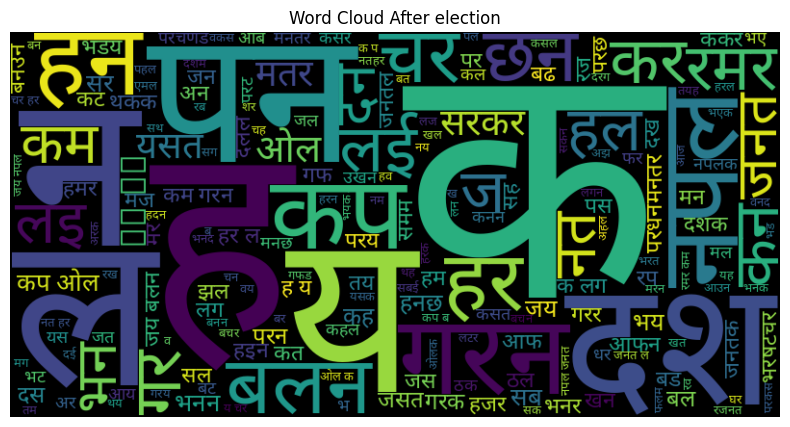

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem2

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After election')
plt.show()

**SENTIMENTAL ANALYSIS**

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="dpkrm/NepaliSentimentAnalysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [ ]:
df_filtered

video_id               author         published_at  like_count  \
0     g0uRUd2WN4c       @somgurung8139  2022-11-13 21:49:35         0.0   
1     AQt_hQ--XwU  @tejendrasalami9316  2022-11-28 02:06:04         2.0   
2     x90ZXr6DD-c   @swipegamingff1320  2022-10-05 04:16:50        13.0   
3     55oY6NA8DSY           @dsrai3358  2022-10-21 02:13:07         1.0   
4     2FJLO13aRS0      @sonamsubba9444  2022-03-23 01:37:07         1.0   
...           ...                  ...                  ...         ...   
3388  fxod58WDCI4     @kajishrestha418  2024-11-01 14:04:28         0.0   
3389  2YvdNxnuZKc     @GorakhRawat-d7y  2024-10-20 15:53:56         1.0   
3390  sLbgM3VA53I   @narayankhanal2985  2024-08-17 12:22:13         0.0   
3391  p9wCood69gg       @chesszone9665  2024-07-22 15:50:38         4.0   
3392  IudbJAIuRbU    @nirajanthapa2980  2024-11-07 16:34:58         0.0   

                                                   text      time_period  \
0                                          рдХрдореЗрдбреА рд╕рд╣реА рд╣реЛ  before_election   
1     рдХреЗрдкреА рдмрд╛ рдХреЛ рд╣рд▓рдХрд╛ рд░рд╛рдореНрд░реЛ рдЫ рд╕рд╛рдереАрд╣рд░реВ рдЕрд░реБ рдиреЗрддрд╛рдХреЛ рднрдиреНрджрд╛  before_election   
2                              рджреБрд░реНрдЧрд╛ рдкрд░реНрд╢рд╛рдИ рдЪрд╛рд╣рд┐рдпреЛ рд╕рд░ред  before_election   
3     рдиреЗрдкрд╛рд▓ рдореИ рдкреИрд╕рд╛ рддреНрд░рд╛ рдореБрдирд┐рдХрд╛ рдиреЗрддрд╛ рд╣рд░реБ рд▓реЗ рдХрд╛рдо рдирдЧрд░реЗ...  before_election   
4                                                  реирежреиреи  before_election   
...                                                 ...              ...   
3388                                    рдЧрдл рдирдЧрд░реМ рдХрд╛рдо рдЧрд░реМ   after_election   
3389                рдШрдиреНрдЯрд╛ рдЧрд░рд┐ рд░рдмрд┐ рджрд╛рдЗ рдХреЛрдИ рдкрдЫрд┐ рд▓рд╛рдЧреЗрдХреЛ рдЫреИ   after_election   
3390  ЁЯОЙ рд░рд╡рд┐рдЬреА рддрдкрд╛рдЗрд▓рд╛рдЗ рдпреЛ рд╕рд░рдХрд╛рд░рд▓реЗ рдЪрд┐рдиреЗрди рдХрд┐рдирдХреА рдирд╛рдЧрд░рд┐рдХрдд...   after_election   
3391  рдЬрди рдЖрдиреНрджреЛрд▓рдирдмрд╛рдЯ рдкрд┐рдбрд┐рддрд╣рд░реБрдХреЛ рдиреНрдпрд╛рдпреЛрдЪрд┐рдд рдврдВрдЧрд▓реЗ рд╕рдорд╛рдзрд╛...   after_election   
3392   рдереБрдЯреБрдиреЛ рдЫ рднрдиреНрджреИрдорд╛ рдЬреЗ рдорди рд▓рд╛рдЧреНрдпреЛ рддреНрдпреЛ рдмреЛрд▓реНрдирдд рднрдпрдирдиреАред   after_election   

          script  
0     Devanagari  
1     Devanagari  
2     Devanagari  
3     Devanagari  
4     Devanagari  
...          ...  
3388  Devanagari  
3389  Devanagari  
3390  Devanagari  
3391  Devanagari  
3392  Devanagari  

[3393 rows x 7 columns]

In [ ]:
# Example prediction logic with truncation
df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None

for i, text in enumerate(df_filtered['text']):  # Assuming 'text' is the column with the content
    result = pipe(text, truncation=True, padding=True, max_length=512)[0]  # Truncate and pad to 512 tokens
    df_filtered.at[i, 'sentiment_label'] = result['label']
    df_filtered.at[i, 'confidence_score'] = result['score']

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


<ipython-input-28-a5bc6cfc2f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
<ipython-input-28-a5bc6cfc2f9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None


                                                text sentiment_label  \
0                                       рдХрдореЗрдбреА рд╕рд╣реА рд╣реЛ         LABEL_2   
1  рдХреЗрдкреА рдмрд╛ рдХреЛ рд╣рд▓рдХрд╛ рд░рд╛рдореНрд░реЛ рдЫ рд╕рд╛рдереАрд╣рд░реВ рдЕрд░реБ рдиреЗрддрд╛рдХреЛ рднрдиреНрджрд╛         LABEL_0   
2                           рджреБрд░реНрдЧрд╛ рдкрд░реНрд╢рд╛рдИ рдЪрд╛рд╣рд┐рдпреЛ рд╕рд░ред         LABEL_0   
3  рдиреЗрдкрд╛рд▓ рдореИ рдкреИрд╕рд╛ рддреНрд░рд╛ рдореБрдирд┐рдХрд╛ рдиреЗрддрд╛ рд╣рд░реБ рд▓реЗ рдХрд╛рдо рдирдЧрд░реЗ...         LABEL_0   
4                                               реирежреиреи         LABEL_0   

  confidence_score  
0         0.996508  
1         0.999866  
2         0.700631  
3         0.999919  
4         0.893962  


In [ ]:
# Map the sentiment labels to corresponding names
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'positive',
    'LABEL_2': 'neutral'
}

# Apply the mapping to the 'sentiment_label' column
df_filtered['sentiment_label'] = df_filtered['sentiment_label'].map(label_mapping)

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


                                                text sentiment_label  \
0                                       рдХрдореЗрдбреА рд╕рд╣реА рд╣реЛ         neutral   
1  рдХреЗрдкреА рдмрд╛ рдХреЛ рд╣рд▓рдХрд╛ рд░рд╛рдореНрд░реЛ рдЫ рд╕рд╛рдереАрд╣рд░реВ рдЕрд░реБ рдиреЗрддрд╛рдХреЛ рднрдиреНрджрд╛        negative   
2                           рджреБрд░реНрдЧрд╛ рдкрд░реНрд╢рд╛рдИ рдЪрд╛рд╣рд┐рдпреЛ рд╕рд░ред        negative   
3  рдиреЗрдкрд╛рд▓ рдореИ рдкреИрд╕рд╛ рддреНрд░рд╛ рдореБрдирд┐рдХрд╛ рдиреЗрддрд╛ рд╣рд░реБ рд▓реЗ рдХрд╛рдо рдирдЧрд░реЗ...        negative   
4                                               реирежреиреи        negative   

  confidence_score  
0         0.996508  
1         0.999866  
2         0.700631  
3         0.999919  
4         0.893962  


<ipython-input-31-a3863f4511b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_label'] = df_filtered['sentiment_label'].map(label_mapping)


In [ ]:
#df_filtered.to_csv('/content/drive/My Drive/merged_data_sentiment_Kp.csv', index=False)

video_id               author         published_at  like_count  \
0     g0uRUd2WN4c       @somgurung8139  2022-11-13 21:49:35         0.0   
1     AQt_hQ--XwU  @tejendrasalami9316  2022-11-28 02:06:04         2.0   
2     x90ZXr6DD-c   @swipegamingff1320  2022-10-05 04:16:50        13.0   
3     55oY6NA8DSY           @dsrai3358  2022-10-21 02:13:07         1.0   
4     2FJLO13aRS0      @sonamsubba9444  2022-03-23 01:37:07         1.0   
...           ...                  ...                  ...         ...   
3388  fxod58WDCI4     @kajishrestha418  2024-11-01 14:04:28         0.0   
3389  2YvdNxnuZKc     @GorakhRawat-d7y  2024-10-20 15:53:56         1.0   
3390  sLbgM3VA53I   @narayankhanal2985  2024-08-17 12:22:13         0.0   
3391  p9wCood69gg       @chesszone9665  2024-07-22 15:50:38         4.0   
3392  IudbJAIuRbU    @nirajanthapa2980  2024-11-07 16:34:58         0.0   

                                                   text      time_period  \
0                                          рдХрдореЗрдбреА рд╕рд╣реА рд╣реЛ  before_election   
1     рдХреЗрдкреА рдмрд╛ рдХреЛ рд╣рд▓рдХрд╛ рд░рд╛рдореНрд░реЛ рдЫ рд╕рд╛рдереАрд╣рд░реВ рдЕрд░реБ рдиреЗрддрд╛рдХреЛ рднрдиреНрджрд╛  before_election   
2                              рджреБрд░реНрдЧрд╛ рдкрд░реНрд╢рд╛рдИ рдЪрд╛рд╣рд┐рдпреЛ рд╕рд░ред  before_election   
3     рдиреЗрдкрд╛рд▓ рдореИ рдкреИрд╕рд╛ рддреНрд░рд╛ рдореБрдирд┐рдХрд╛ рдиреЗрддрд╛ рд╣рд░реБ рд▓реЗ рдХрд╛рдо рдирдЧрд░реЗ...  before_election   
4                                                  реирежреиреи  before_election   
...                                                 ...              ...   
3388                                    рдЧрдл рдирдЧрд░реМ рдХрд╛рдо рдЧрд░реМ   after_election   
3389                рдШрдиреНрдЯрд╛ рдЧрд░рд┐ рд░рдмрд┐ рджрд╛рдЗ рдХреЛрдИ рдкрдЫрд┐ рд▓рд╛рдЧреЗрдХреЛ рдЫреИ   after_election   
3390  ЁЯОЙ рд░рд╡рд┐рдЬреА рддрдкрд╛рдЗрд▓рд╛рдЗ рдпреЛ рд╕рд░рдХрд╛рд░рд▓реЗ рдЪрд┐рдиреЗрди рдХрд┐рдирдХреА рдирд╛рдЧрд░рд┐рдХрдд...   after_election   
3391  рдЬрди рдЖрдиреНрджреЛрд▓рдирдмрд╛рдЯ рдкрд┐рдбрд┐рддрд╣рд░реБрдХреЛ рдиреНрдпрд╛рдпреЛрдЪрд┐рдд рдврдВрдЧрд▓реЗ рд╕рдорд╛рдзрд╛...   after_election   
3392   рдереБрдЯреБрдиреЛ рдЫ рднрдиреНрджреИрдорд╛ рдЬреЗ рдорди рд▓рд╛рдЧреНрдпреЛ рддреНрдпреЛ рдмреЛрд▓реНрдирдд рднрдпрдирдиреАред   after_election   

          script sentiment_label confidence_score  
0     Devanagari         neutral         0.996508  
1     Devanagari        negative         0.999866  
2     Devanagari        negative         0.700631  
3     Devanagari        negative         0.999919  
4     Devanagari        negative         0.893962  
...          ...             ...              ...  
3388  Devanagari         neutral         0.697656  
3389  Devanagari        positive         0.998954  
3390  Devanagari        positive         0.999018  
3391  Devanagari        positive         0.999127  
3392  Devanagari        negative         0.999868  

[3393 rows x 9 columns]

In [5]:
#df_filtered = pd.read_csv('/content/drive/My Drive/merged_data_sentiment_Kp.csv')

In [6]:
# Assuming 'time_period' is a column in your DataFrame and contains 'before_election' and 'after_election'
# and 'sentiment_label' contains the sentiment labels ('positive', 'negative', 'neutral')

# Filter for before_election and after_election
before_election_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_election_df = df_filtered[df_filtered['time_period'] == 'after_election']

# Count sentiment labels for before_election
before_election_counts = before_election_df['sentiment_label'].value_counts()

# Count sentiment labels for after_election
after_election_counts = after_election_df['sentiment_label'].value_counts()

# Display the counts
print("Sentiment counts before election:")
print(before_election_counts)

print("\nSentiment counts after election:")
print(after_election_counts)


Sentiment counts before election:
sentiment_label
negative    668
neutral     405
positive    306
Name: count, dtype: int64

Sentiment counts after election:
sentiment_label
negative    920
neutral     584
positive    510
Name: count, dtype: int64


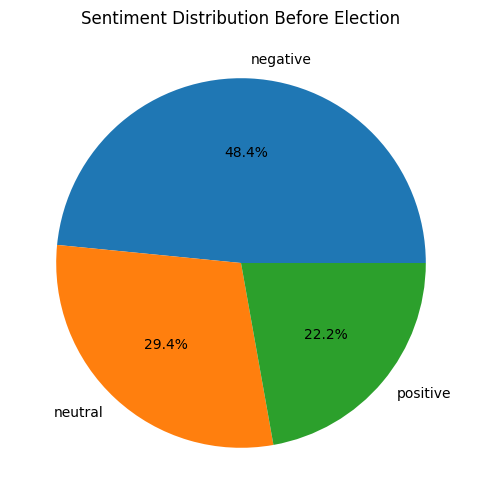

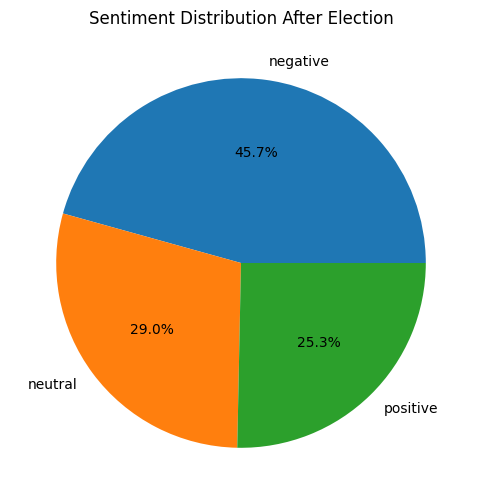

In [7]:
import matplotlib.pyplot as plt

# Plot the pie chart for before election
plt.figure(figsize=(6, 6))
before_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=before_election_counts.index)
plt.title('Sentiment Distribution Before Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()

# Plot the pie chart for after election
plt.figure(figsize=(6, 6))
after_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=after_election_counts.index)
plt.title('Sentiment Distribution After Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()


In [8]:
# Define a list of Nepali stopwords 
nepali_stopwords = [
    'рд╣реЛ', 'рдХреЛ', 'рд░', 'рдпреЛ', 'рдЫ', 'рдкрдирд┐', 'рдХреЗ', 'рдХреБрд░рд╛', 'рдд', 'рдПрдХ', 'рдо', 'рдЙрд╣рд╛рдБ', 'рддрд┐рдореА', 'рдЧрд░реНрдиреЗ'
    'рд╣рд╛рдореА', 'рддрд┐рдореАрд╣рд░реВ', 'рд╣рд╛рдореАрд╣рд░реВ', 'рдЙрд╕рдХреЛ', 'рдЙрдиреА', 'рддрд┐рдиреА', 'рдорд╛рдерд┐', 'рдиреАрдЪреЗ', 'рдЖрджрд┐', 'рдорд╛рддреНрд░', 'рддрд░','рд▓рд╛рдИ', 'рджреЗрд╢', 'рд▓реЗ', 'рдорд╛', 'рдЕрдм', 'рдиреИ', 'рдЬрдирддрд╛', 'рдХрд╛рдо', 'рдиреЗрдкрд╛рд▓', 'рдЕрдирд┐', 'рд╡рд░реНрд╖', 'рд╣реБрди', 'рд╣реЛ', 'рднрдПрдХреЛ', 'рдерд┐рдпреЛ', 'рдХреЗ', 'рддрдкрд╛рдИрдВ', 'рд╕рд╛рде', 'рдХреБрд░рд╛', 'рдпреЛ', 'рдЙрд╣рд╛рдБ', 'рдЫ', 'рд░', 'рд╣реЛ', 'рдкрдирд┐', 'рдЧрд░реНрджреИрди', 'рд╣рд░реБ', 'ред'
    # Add any additional words you find unnecessary here
]

# Add English stopwords if you're also analyzing English texts
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

# Combine Nepali and English stopwords (optional)
stopwords_combined = set(nepali_stopwords + list(english_stopwords))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
import string  # Add this import at the top of your code

# Filter the words to exclude stopwords
def clean_text_without_stopwords(text, stopwords_combined):
    # Convert text to lowercase, remove punctuation, and split into words
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # This removes punctuation
    return [word for word in text.split() if word not in stopwords_combined]

# Apply the cleaning function to the text columns
before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


<ipython-input-9-10072db0a911>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
<ipython-input-9-10072db0a911>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


In [10]:
import string  # Add this import at the top of your code

# Filter the words to exclude stopwords
def clean_text_without_stopwords(text, stopwords_combined):
    # Convert text to lowercase, remove punctuation, and split into words
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # This removes punctuation
    return [word for word in text.split() if word not in stopwords_combined]

# Apply the cleaning function to the text columns
before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


<ipython-input-10-10072db0a911>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
<ipython-input-10-10072db0a911>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


Top 10 Words Before Election:
     Word  Count
0    рдХреЗрдкреА    258
1     рдУрд▓реА    169
2      рдмрд╛    125
3    рдкрд╛рдиреА     78
4    рдиреЗрддрд╛     70
5     рдЪреЛрд░     60
6     рд▓рд╛рдЗ     57
7  рд░рд╛рдореНрд░реЛ     55
8    рд╣реЛрд▓рд╛     48
9  рдиреЗрдкрд╛рд▓реА     47

Top 10 Words After Election:
     Word  Count
0    рдХреЗрдкреА    190
1     рдУрд▓реА    129
2     рдЪреЛрд░    124
3      br    107
4      рдЬрдп     99
5    рдиреЗрддрд╛     91
6  рдиреЗрдкрд╛рд▓реА     90
7  рд░рд╛рдореНрд░реЛ     88
8     рд▓рд╛рдЗ     84
9   рдмрд╛рд▓реЗрди     73


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


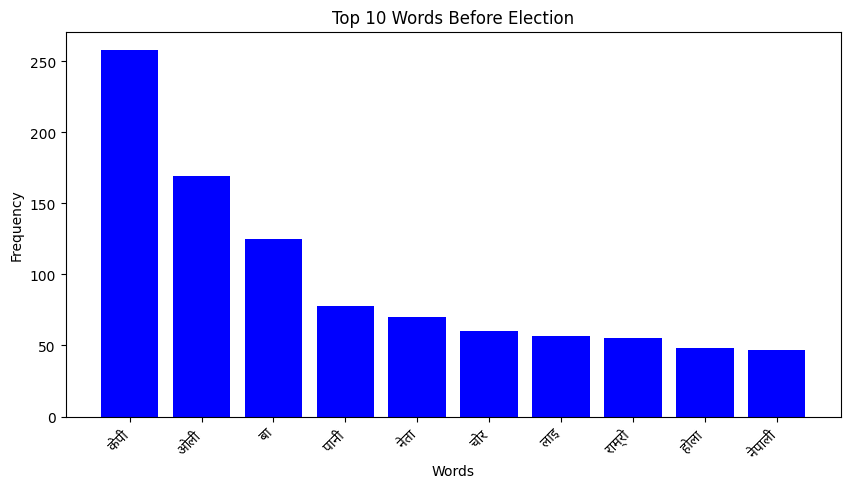

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 98 (b) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 114 (r) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


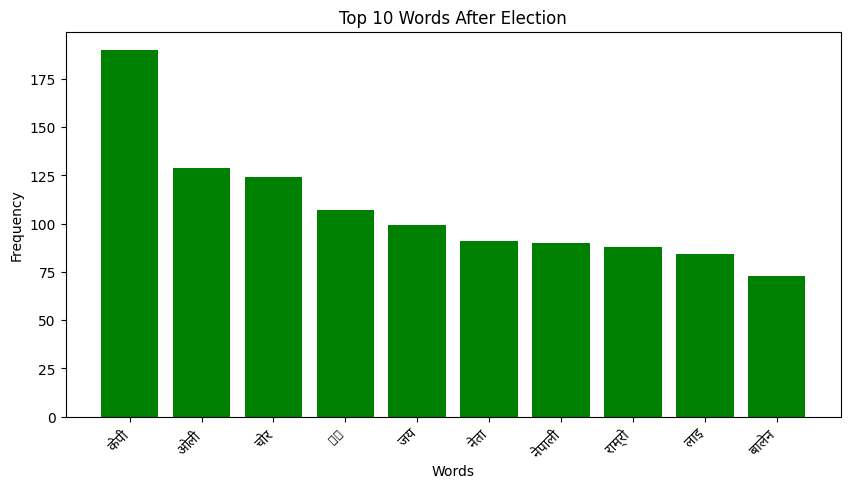

In [11]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import requests

# Load Devanagari-compatible font dynamically
font_url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf"
font_path = "NotoSansDevanagari-Regular.ttf"

# Download font if not already present
if not os.path.exists(font_path):
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)

# Load the font
deva_font = fm.FontProperties(fname=font_path)



# Recalculate word frequencies
before_election_words = [word for text in before_election_df['cleaned_text'] for word in text]
after_election_words = [word for text in after_election_df['cleaned_text'] for word in text]

before_election_word_counts = Counter(before_election_words)
after_election_word_counts = Counter(after_election_words)

# Get the top 10 most common words
top_before_words = before_election_word_counts.most_common(10)
top_after_words = after_election_word_counts.most_common(10)

# Convert to DataFrame for easy visualization
before_top_words_df = pd.DataFrame(top_before_words, columns=['Word', 'Count'])
after_top_words_df = pd.DataFrame(top_after_words, columns=['Word', 'Count'])

# Print the top words
print("Top 10 Words Before Election:")
print(before_top_words_df)

print("\nTop 10 Words After Election:")
print(after_top_words_df)

# Plot the top words before election
plt.figure(figsize=(10, 5))
plt.bar(before_top_words_df['Word'], before_top_words_df['Count'], color='blue')
plt.title('Top 10 Words Before Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()

# Plot the top words after election
plt.figure(figsize=(10, 5))
plt.bar(after_top_words_df['Word'], after_top_words_df['Count'], color='green')
plt.title('Top 10 Words After Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()
